# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Importing Data

In [454]:
df = pd.read_csv('https://raw.githubusercontent.com/DnYAlv/ML-Mini-Project/main/Mall-Customer/Mall_Customers.csv')
df.drop(['CustomerID'],axis=1,inplace=True)

# Data Cleaning

## Checking missing values

In [455]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visual Exploratory Data Analysis

In [456]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [457]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [458]:
df.shape

(200, 4)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [460]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


### Checking Correlation

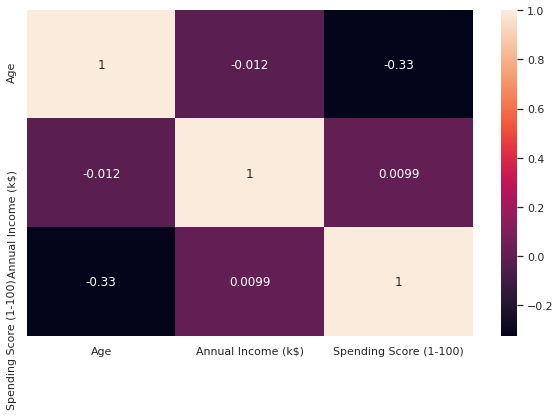

In [461]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Dari sini bisa dilihat bahwa korelasi yang positif kuat terdapat pada variabel CustomerID dengan Annual Income (k$). Namun, Age dengan Spending Score memilki korelasi negatif yang kuat


## Visualize between >= 2 Variables

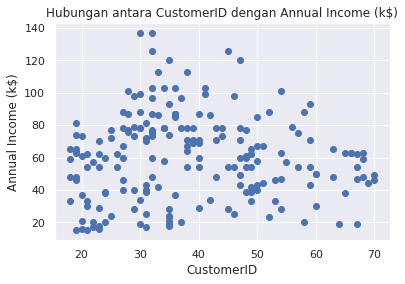

In [463]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('CustomerID')
plt.title('Hubungan antara CustomerID dengan Annual Income (k$)')
plt.show()

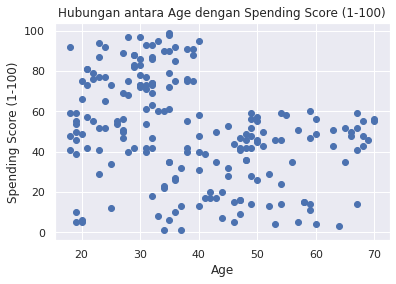

In [464]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.title('Hubungan antara Age dengan Spending Score (1-100)')
plt.show()

### Checking Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


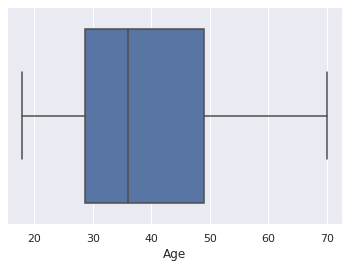

In [465]:
sns.boxplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


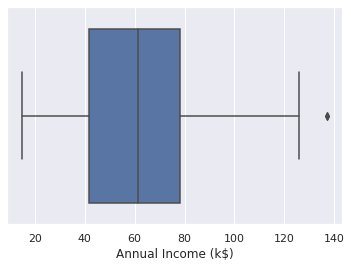

In [466]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

- Terdapat outlier di feature Annual Income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


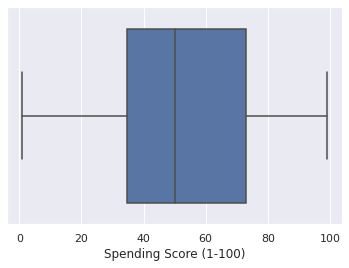

In [467]:
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

### Checking Distributions

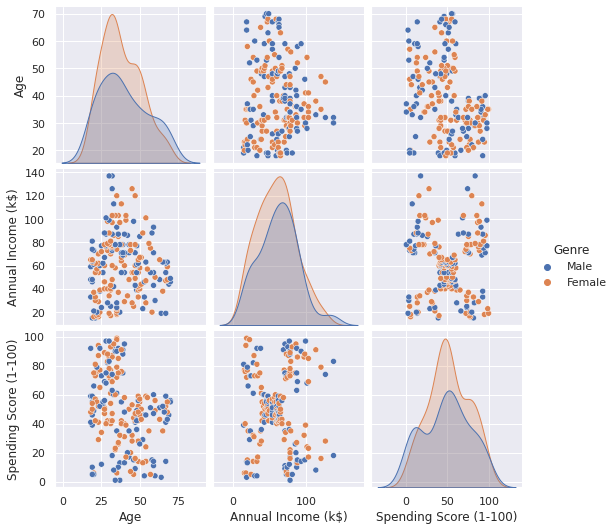

In [468]:
sns.pairplot(df, hue='Genre')

# Training and testing

In [471]:
features = ['Genre', 'Age', 'Annual Income (k$)']
X = df[features]
y = df['Spending Score (1-100)']

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [473]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [474]:
X_train.head()

,Genre,Age,Annual Income (k$)
79,Female,49,54
197,Male,32,126
38,Female,36,37
24,Female,54,28
122,Female,40,69


## Categorical Variables

In [475]:
s = (X_train.dtypes=='object')
object_cols = list(s[s].index)

object_cols

['Genre']

In [476]:
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH.transform(X_test[object_cols]))

OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [477]:
OH_X_train

,Age,Annual Income (k$),0,1
79,49,54,1.0,0.0
197,32,126,0.0,1.0
38,36,37,1.0,0.0
24,54,28,1.0,0.0
122,40,69,1.0,0.0
...,...,...,...,...
106,66,63,1.0,0.0
14,37,20,0.0,1.0
92,48,60,0.0,1.0
179,35,93,0.0,1.0


In [478]:
OH_X_test.head()

,Age,Annual Income (k$),0,1
95,24,60,0.0,1.0
15,22,20,0.0,1.0
30,60,30,0.0,1.0
158,34,78,0.0,1.0
128,59,71,0.0,1.0


In [479]:
X_train.head()

,Genre,Age,Annual Income (k$)
79,Female,49,54
197,Male,32,126
38,Female,36,37
24,Female,54,28
122,Female,40,69


- Male = 1, Female = 0

## Training set

In [480]:
OH_X_train

,Age,Annual Income (k$),0,1
79,49,54,1.0,0.0
197,32,126,0.0,1.0
38,36,37,1.0,0.0
24,54,28,1.0,0.0
122,40,69,1.0,0.0
...,...,...,...,...
106,66,63,1.0,0.0
14,37,20,0.0,1.0
92,48,60,0.0,1.0
179,35,93,0.0,1.0


In [481]:
OH_X_test.head()

,Age,Annual Income (k$),0,1
95,24,60,0.0,1.0
15,22,20,0.0,1.0
30,60,30,0.0,1.0
158,34,78,0.0,1.0
128,59,71,0.0,1.0


In [482]:
y_test.head()

95     52
15     79
30      4
158     1
128    11
Name: Spending Score (1-100), dtype: int64

# Modelling (Linear Regression)

In [483]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(OH_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Spending Score

In [484]:
pred = model.predict(OH_X_test)

## True Value vs Predicted Value

In [485]:
# print(pred)
# print(y_test)
new_columns = pd.DataFrame({
    'y_test':y_test,
    'Predicted':pred
})
new_columns

,y_test,Predicted
95,52,59.828129
15,79,58.849457
30,4,37.046989
158,1,54.918427
128,11,39.843295
115,50,64.235528
69,47,55.676850
170,13,51.875652
174,13,46.072897
45,65,59.895472


# Model Evaluation

## Coefficient

In [486]:
coef_dict = {}

for coef, feat in zip(model.coef_, features):
  coef_dict[feat] = coef

In [487]:
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index')
coef_df.columns = ['Coefficient']
print(coef_df)

                    Coefficient
Genre                 -0.587924
Age                    0.053863
Annual Income (k$)     0.599233


In [488]:
print(f'Mean Absolute Error: {mean_absolute_error(pred, y_test)}')
print(f'RMSE: {np.sqrt(mean_squared_error(pred, y_test))}')
print(f'MSE: {mean_squared_error(pred, y_test)}')
print(f'Score: {model.score(OH_X_test, y_test)}')

Mean Absolute Error: 18.151395326685105
RMSE: 21.924259205438343
MSE: 480.67314170724785
Score: 0.02547818160074633


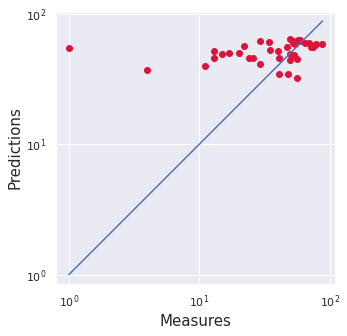

In [489]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Measures', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()